# F21DL- Dan G1 - Edmond Liu(jl2058)

In [201]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
# load data
dataset = pd.read_csv('House-Price-Prediction-clean.csv')

In [206]:
dataset.shape

(1460, 32)

In [207]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [208]:
dataset.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [209]:
dataset.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,830,136,1256,...,736,68,0,0,0,0,0,6,2008,147500


In [210]:
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [211]:
dataset.duplicated().sum()

0

In [212]:
dataset.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


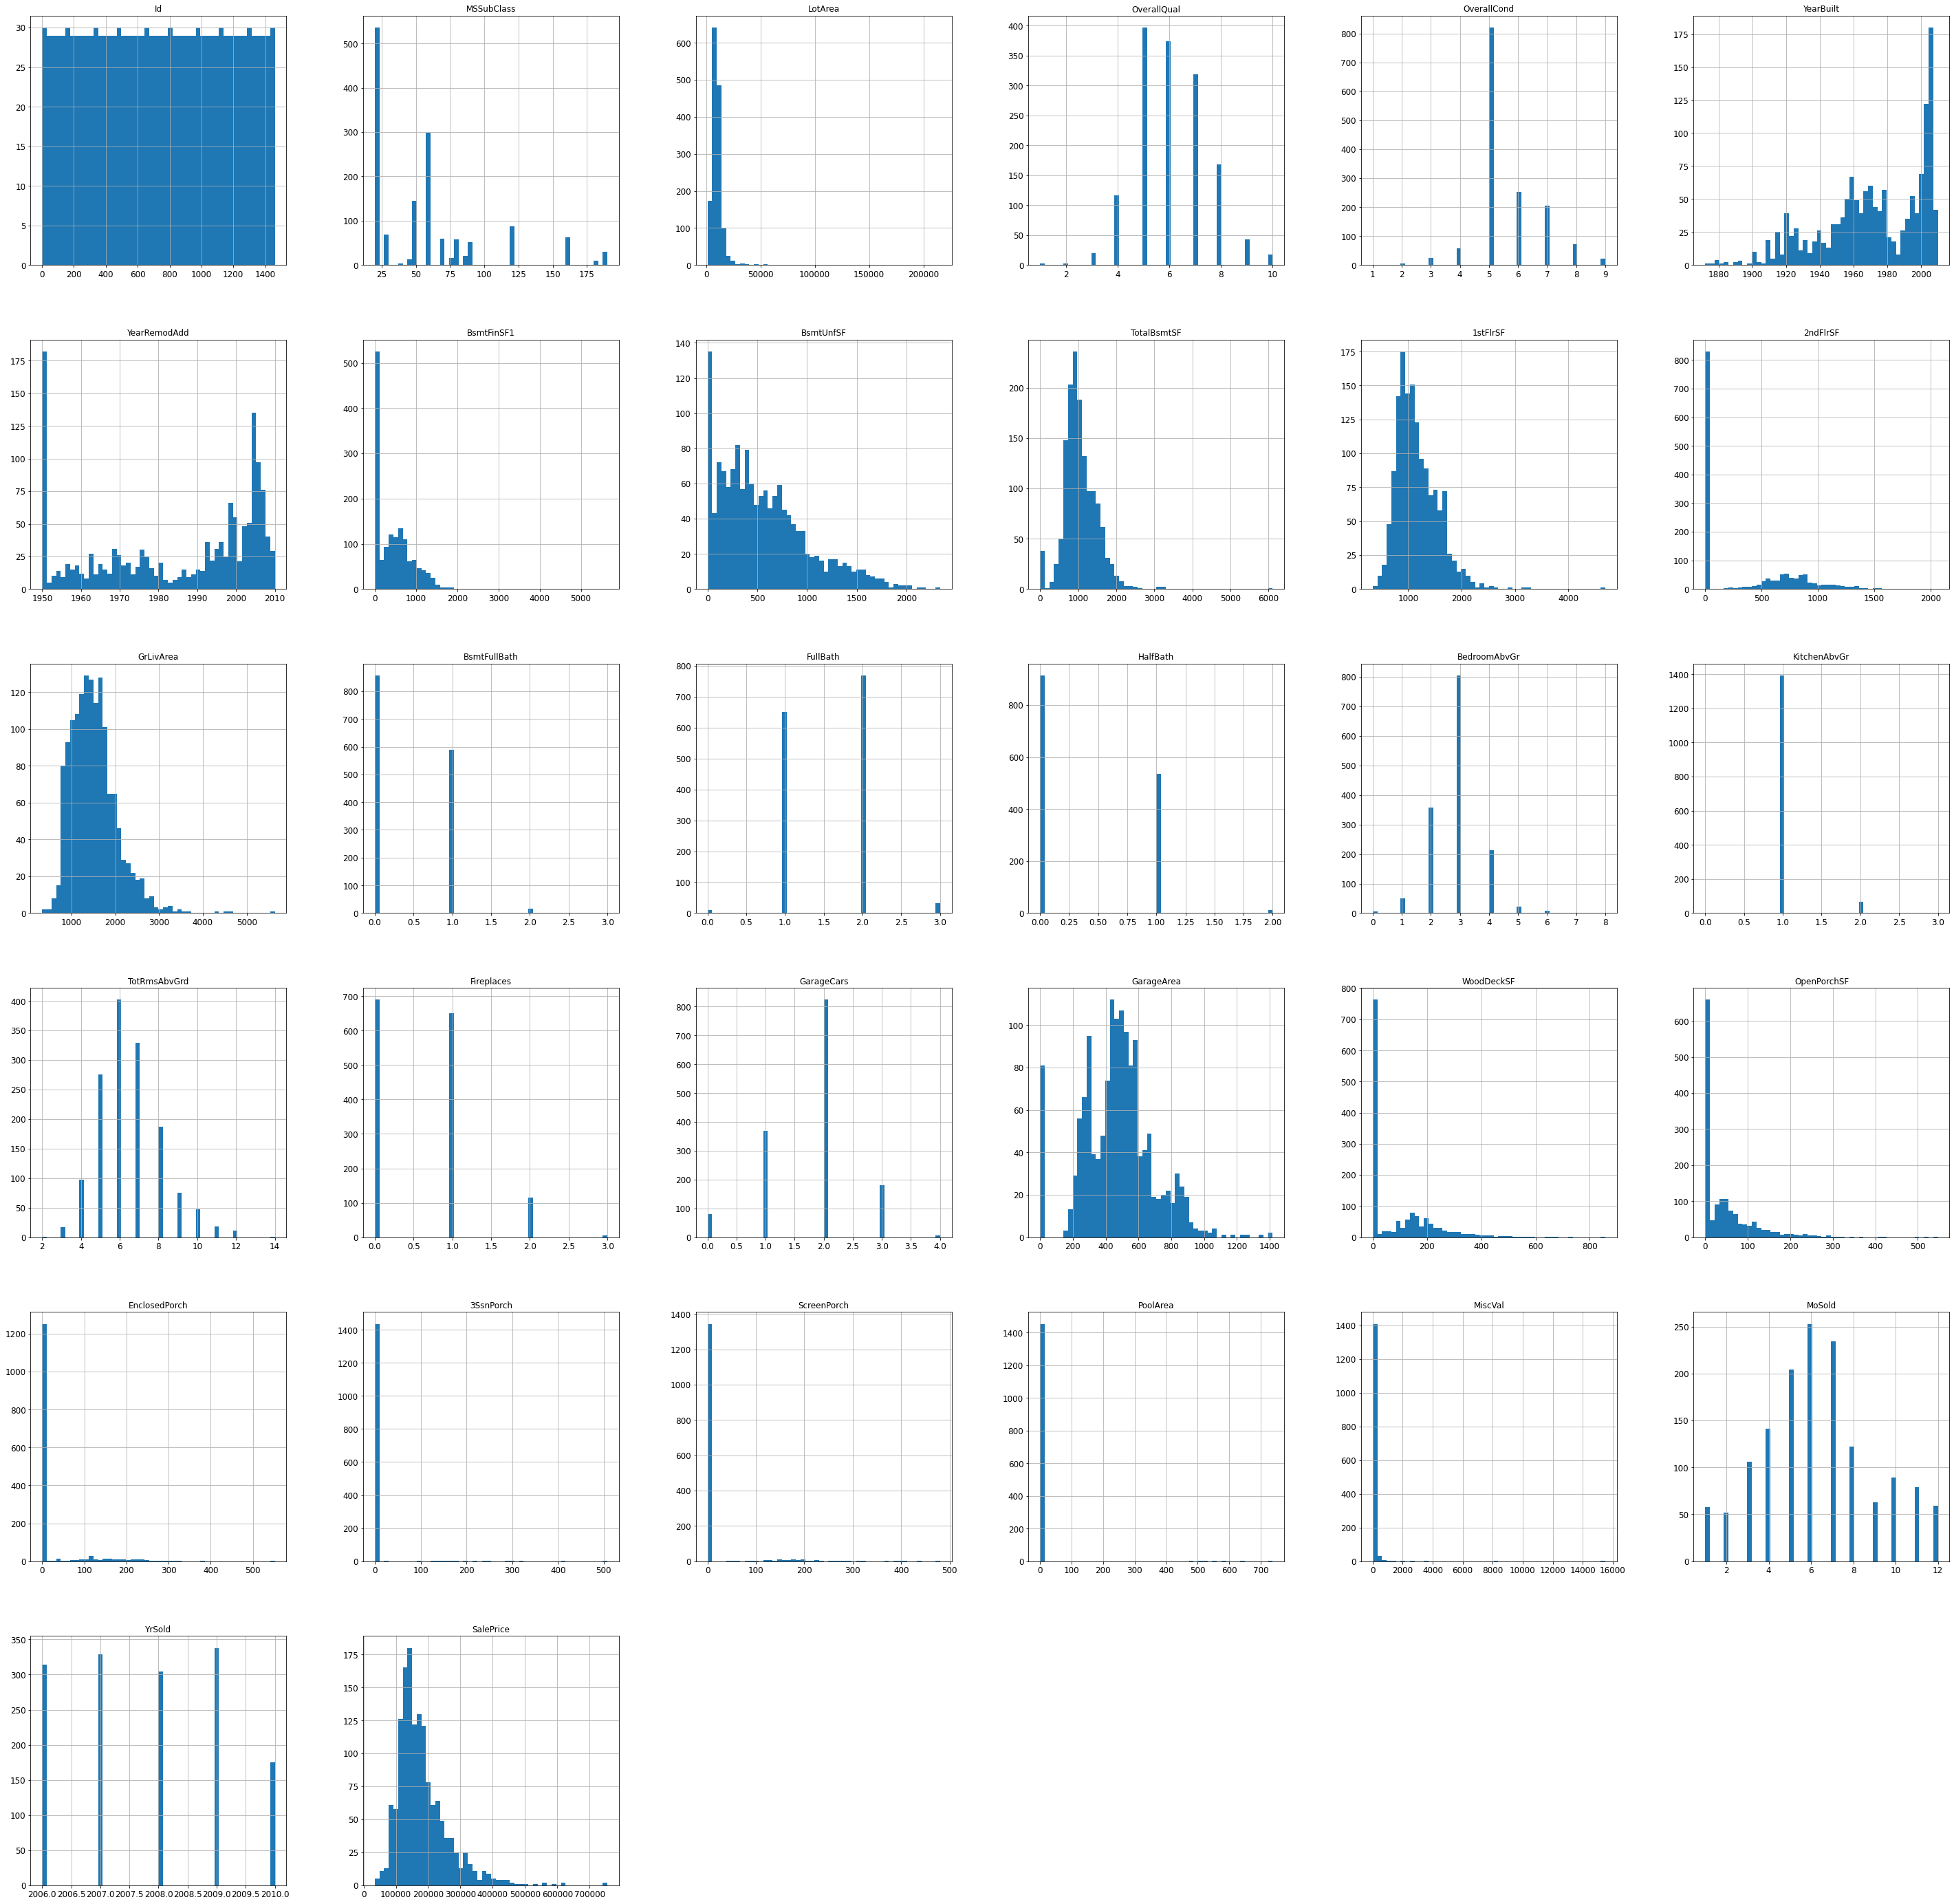

In [213]:
dataset.hist(bins=50, figsize=(50,50))
plt.show()

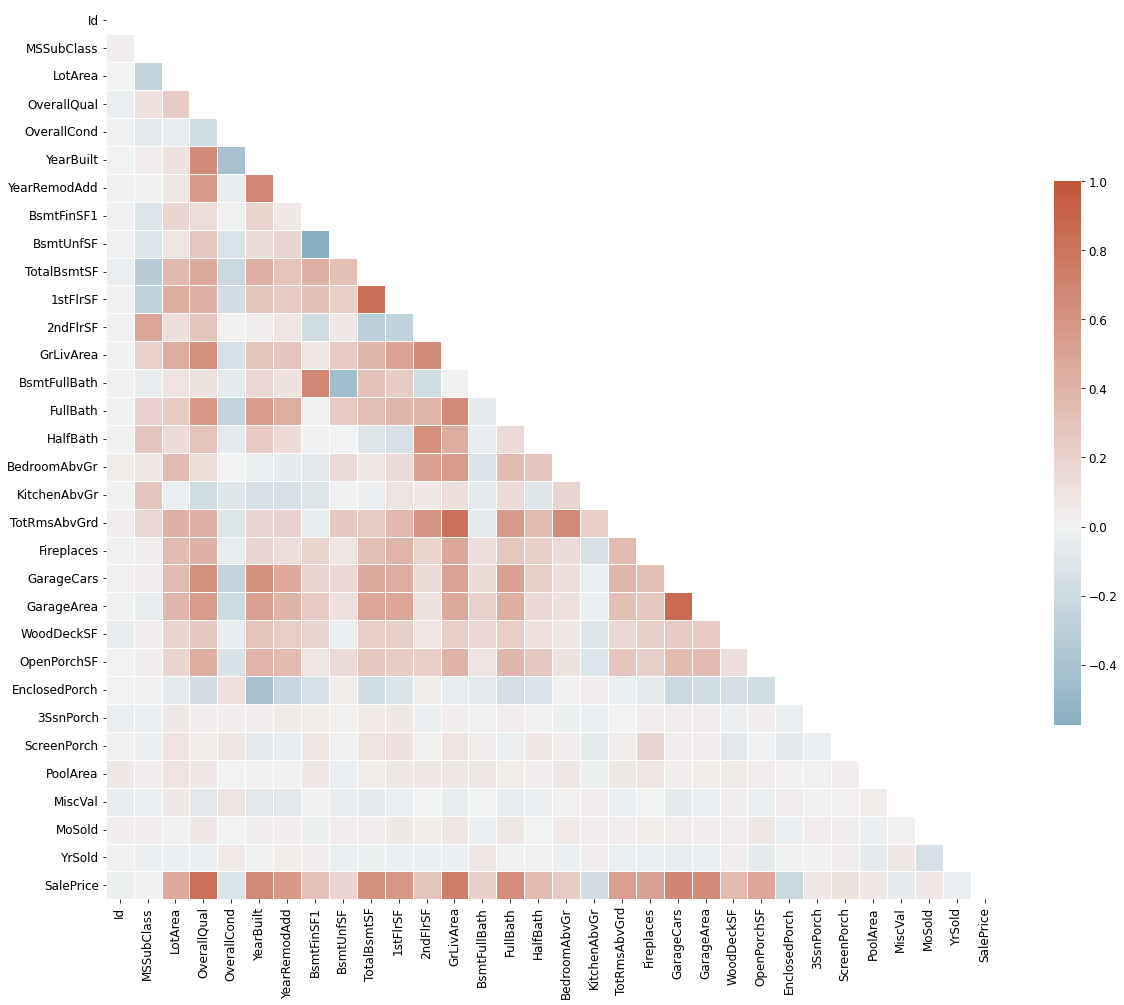

In [214]:
f, ax = plt.subplots(figsize=(20, 20))
mat = dataset.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

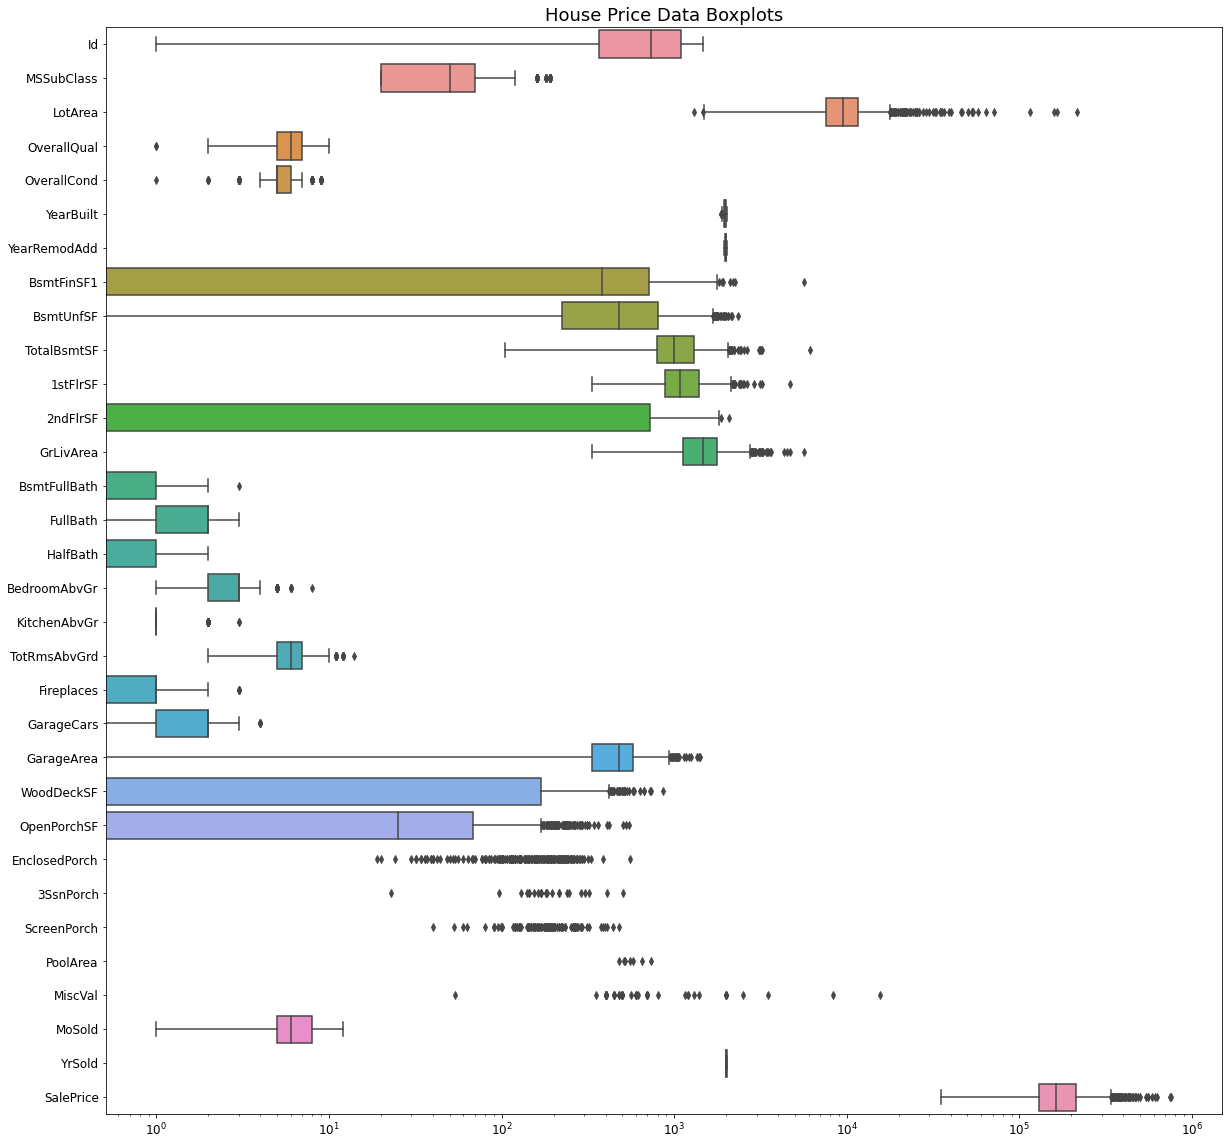

In [215]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = dataset, orient="h")
ax.set_title('House Price Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

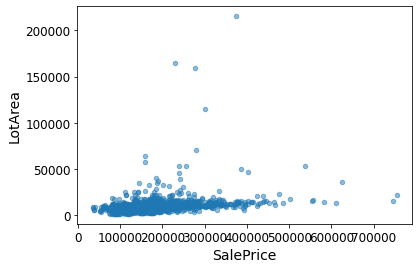

In [216]:
dataset.plot(kind="scatter", x="SalePrice", y="LotArea", alpha=0.5)

In [217]:
corr_matrix = dataset.corr()

In [218]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GarageArea'>,
        <AxesSubplot:xlabel='GarageArea', yla

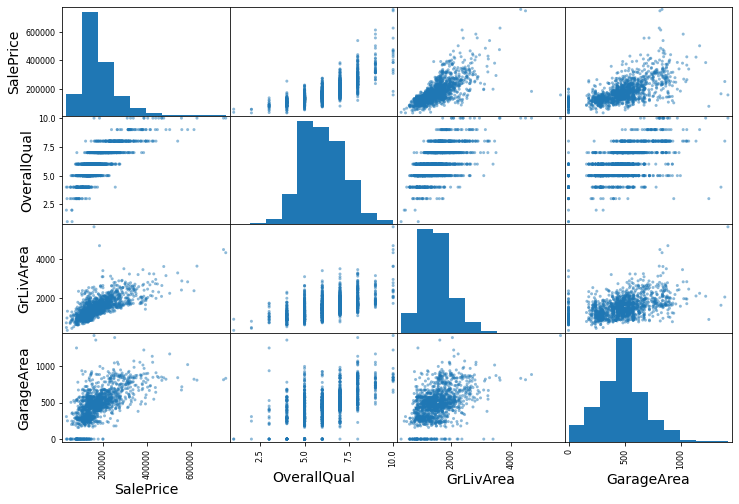

In [219]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

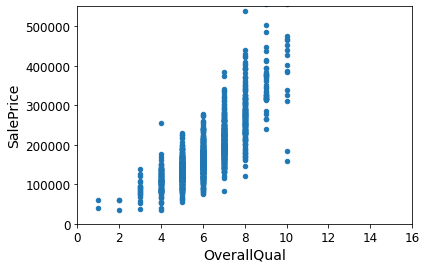

In [220]:
dataset.plot(kind="scatter", x="OverallQual", y="SalePrice",
             alpha=1.0)
plt.axis([0, 16, 0, 550000])

(0.0, 16.0, 0.0, 550000.0)

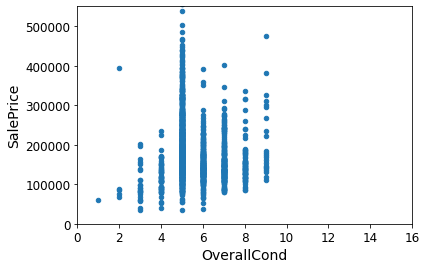

In [221]:
dataset.plot(kind="scatter", x="OverallCond", y="SalePrice",
             alpha=1.0)
plt.axis([0, 16, 0, 550000])

In [222]:
dataset["HouseAge"] = dataset["YrSold"]-dataset["YearBuilt"]

### Find the most correlating features

In [366]:
corr_matrix = dataset.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePrice, dtype: float64

In [224]:
dataset = dataset.drop("Id", axis=1) 
dataset = dataset.drop("MiscVal", axis=1) 
dataset = dataset.drop("YrSold", axis=1) 
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,2,208500,5
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,5,181500,31
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,9,223500,7
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,2,140000,91
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,12,250000,8


In [225]:
dataset.sort_values("SalePrice")

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge
495,30,7879,4,5,1920,1950,495,225,720,720,...,0,0,523,115,0,0,0,11,34900,89
916,20,9000,2,3,1949,1950,50,430,480,480,...,308,0,0,0,0,0,0,10,35311,57
968,50,5925,3,6,1910,1950,0,600,600,600,...,0,0,0,0,0,0,0,5,37900,99
533,20,5000,1,3,1946,1950,0,0,0,334,...,0,0,0,0,0,0,0,1,39300,61
30,70,8500,4,4,1920,1950,0,649,649,649,...,250,0,54,172,0,0,0,7,40000,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,60,13891,9,5,2008,2009,0,1734,1734,1734,...,1020,52,170,0,0,192,0,1,582933,1
898,20,12919,9,5,2009,2010,2188,142,2330,2364,...,820,0,67,0,0,0,0,3,611657,1
1169,60,35760,10,5,1995,1996,1387,543,1930,1831,...,807,361,76,0,0,0,0,7,625000,11
1182,60,15623,10,5,1996,1996,2096,300,2396,2411,...,813,171,78,0,0,0,555,7,745000,11


### Form 3 data sets, that contain progressively fewer features/attributes.

In [226]:
dataset_1 = dataset[["SalePrice","OverallQual","GrLivArea"]]

In [227]:
#standard correlation coefficient (Pearson’s r) method
dataset_1.corr(method ='pearson')

,SalePrice,OverallQual,GrLivArea
SalePrice,1.000000,0.790982,0.708624
OverallQual,0.790982,1.000000,0.593007
GrLivArea,0.708624,0.593007,1.000000


In [228]:
corr_matrix1 = dataset_1.corr()

In [229]:
corr_matrix1['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>]],
      dtype=object)

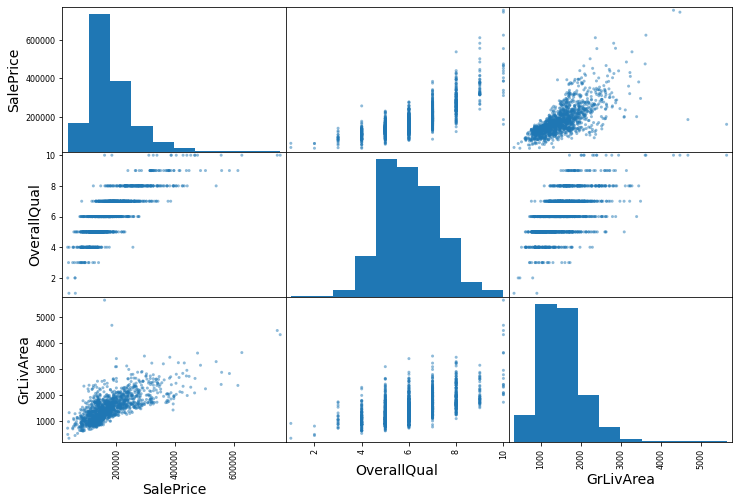

In [230]:
attributes = ["SalePrice", "OverallQual", "GrLivArea"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

In [231]:
dataset_2 = dataset[["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]]

In [232]:
dataset_2.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,208500,7,1710,2,548,856
1,181500,6,1262,2,460,1262
2,223500,7,1786,2,608,920
3,140000,7,1717,3,642,756
4,250000,8,2198,3,836,1145


In [233]:
corr_matrix2 = dataset_2.corr()
corr_matrix2['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [234]:
#standard correlation coefficient (Pearson’s r) method
dataset_2.corr(method ='pearson')

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', 

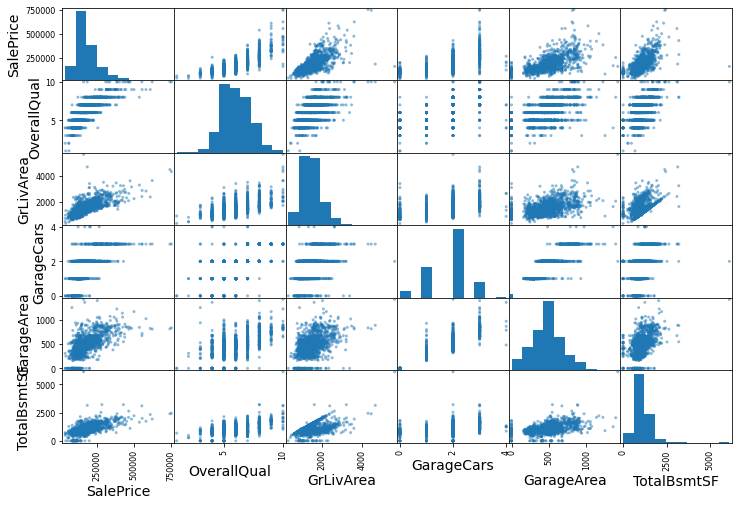

In [235]:
attributes = ["SalePrice", "OverallQual", "GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

In [236]:
dataset_3 = dataset[["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","HouseAge"]]

In [237]:
dataset_3.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,HouseAge
0,208500,7,1710,2,548,856,856,2,8,2003,5
1,181500,6,1262,2,460,1262,1262,2,6,1976,31
2,223500,7,1786,2,608,920,920,2,6,2001,7
3,140000,7,1717,3,642,756,961,1,7,1915,91
4,250000,8,2198,3,836,1145,1145,2,9,2000,8


In [238]:
corr_matrix3 = dataset_3.corr()
corr_matrix3['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
HouseAge       -0.523350
Name: SalePrice, dtype: float64

In [239]:
#standard correlation coefficient (Pearson’s r) method
dataset_3.corr(method ='pearson')

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,HouseAge
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,-0.523350
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,-0.572629
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,-0.200302
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,-0.538727
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,-0.479408
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,-0.391498
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,-0.282143
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,-0.468403
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,-0.096955
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,-0.999036


array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='Ov

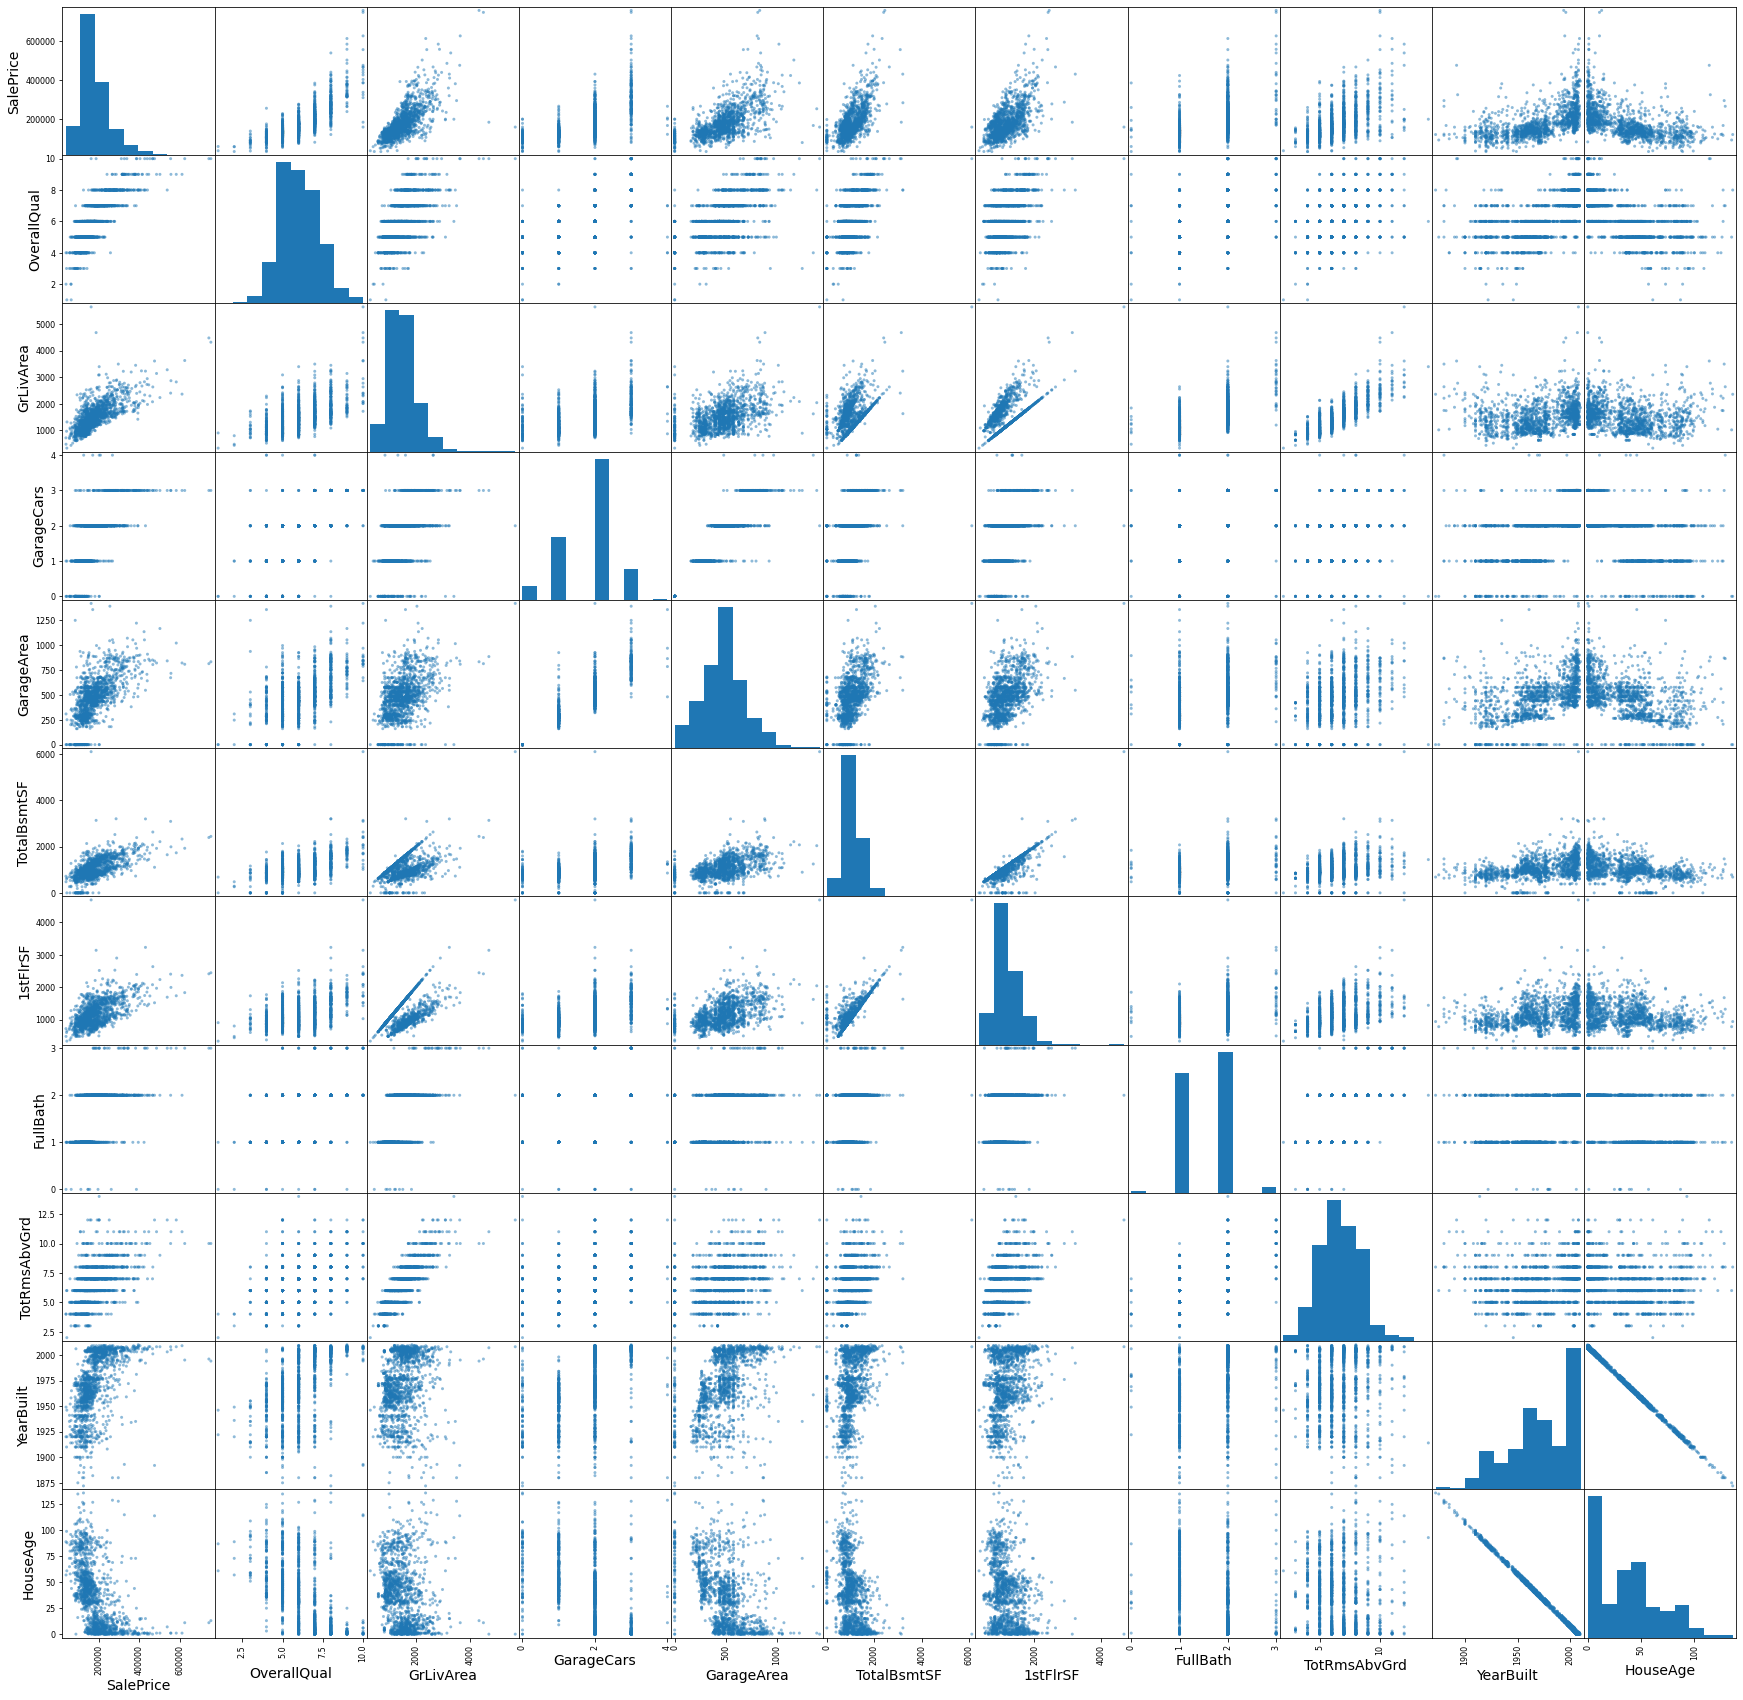

In [240]:
attributes = ["SalePrice", "OverallQual", "GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","HouseAge"]
scatter_matrix(dataset[attributes], figsize=(30, 30))

In [241]:
# import csv

# dataset_1.to_csv('dataset_1.csv', encoding='utf-8', index=False)
# dataset_2.to_csv('dataset_2.csv', encoding='utf-8', index=False)
# dataset_3.to_csv('dataset_3.csv', encoding='utf-8', index=False)


### Scikit-Learn Linear Regression Classifier, Decision Tree Classifier & Random Forest Classifier

In [242]:
from sklearn.model_selection import train_test_split

#--------the whole dataset----------------
# Differencing the features and the output
X = dataset.drop('SalePrice', 1)
y = dataset['SalePrice']
# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#--------dataset_1 with 2 top features----------------
X_1 = dataset_1.drop('SalePrice', 1)
y_1 = dataset_1['SalePrice']
# Creating training and testing sub datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

#--------dataset_2 with 5 top features----------------
X_2 = dataset_2.drop('SalePrice', 1)
y_2 = dataset_2['SalePrice']
# Creating training and testing sub datasets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

#--------dataset_3 with 10 top features----------------
X_3 = dataset_3.drop('SalePrice', 1)
y_3 = dataset_3['SalePrice']
# Creating training and testing sub datasets
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

### LinearRegression & DecisionTree classifier

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### linear regression, decision tree and random forest for whole dataset

In [244]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate  model 
r2_lr = r2_score(y_test, ypred)
#  mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))
print(r2_lr)

0.6434573722627156


In [245]:
#Create a DecisionTree object
dt = DecisionTreeRegressor()
#Fit X and y
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_dt = r2_score(y_test, yhat)
#, mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))
print(r2_dt)

0.7876246951997179


In [246]:
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train, y_train)
r2_rf = rf.score(X_test,y_test)
print(r2_rf)

0.8515670537275062


#### linear regression, decision tree and random forest for dataset1

In [247]:
#Create a LinearRegression object
lr1= LinearRegression()
#Fit X and y 
lr1.fit(X1_train, y1_train)
y1pred = lr1.predict(X1_test)
#Metrics to evaluate model 
r2_lr1 = r2_score(y1_test, y1pred)
#, mean_absolute_error(y1_test, y1pred), np.sqrt(mean_squared_error(y1_test, y1pred))
print(r2_lr1)

0.6750362162560188


In [248]:
dt1 = DecisionTreeRegressor()
dt1.fit(X1_train, y1_train)
y1hat = dt1.predict(X1_test)
r2_dt1 = r2_score(y1_test, y1hat)
#, mean_absolute_error(y1_test, y1hat), np.sqrt(mean_squared_error(y1_test, y1hat))
r2_dt1

0.6973974769642677

In [249]:
rf1 = RandomForestRegressor(n_estimators=300)
rf1.fit(X1_train, y1_train)
r2_rf1 = rf1.score(X1_test,y1_test)
r2_rf1

0.7559904335229674

#### linear regression, decision tree and random forest for dataset2

In [250]:
#Create a LinearRegression object
lr2= LinearRegression()
#Fit X and y 
lr2.fit(X2_train, y2_train)
y2pred = lr2.predict(X2_test)
#Metrics to evaluate model 
r2_lr2 = r2_score(y2_test, y2pred)
#, mean_absolute_error(y2_test, y2pred), np.sqrt(mean_squared_error(y2_test, y2pred))
r2_lr2

0.6370695035608218

In [251]:
dt2 = DecisionTreeRegressor()
dt2.fit(X2_train, y2_train)
y2hat = dt2.predict(X2_test)
r2_dt2 = r2_score(y2_test, y2hat)
#, mean_absolute_error(y2_test, y2hat), np.sqrt(mean_squared_error(y2_test, y2hat))
r2_dt2

0.7554371707670875

In [252]:
rf2 = RandomForestRegressor(n_estimators=300)
rf2.fit(X2_train, y2_train)
r2_rf2 = rf2.score(X2_test,y2_test)
r2_rf2

0.830499248994887

#### linear regression, decision tree and random forest for dataset3

In [253]:
#Create a LinearRegression object
lr3= LinearRegression()
#Fit X and y 
lr3.fit(X3_train, y3_train)
y3pred = lr3.predict(X3_test)
#Metrics to evaluate model 
r2_lr3 = r2_score(y3_test, y3pred)
#, mean_absolute_error(y3_test, y3pred), np.sqrt(mean_squared_error(y3_test, y3pred))
r2_lr3

0.6371769831801073

In [254]:
dt3 = DecisionTreeRegressor()
dt3.fit(X3_train, y3_train)
y3hat = dt3.predict(X3_test)
r2_dt3 = r2_score(y3_test, y3hat)
#, mean_absolute_error(y3_test, y3hat), np.sqrt(mean_squared_error(y3_test, y3hat))
r2_dt3

0.7666117065912798

In [255]:
rf3 = RandomForestRegressor(n_estimators=300)
rf3.fit(X3_train, y3_train)
r2_rf3 = rf3.score(X3_test,y3_test)
r2_rf3

0.8538597789506468

In [256]:
# !pip install tabulate

#### comparsion table of r2_score 

In [257]:
from tabulate import tabulate

In [258]:
table = [['datasetName','NumberOfFeatures' ,'lr_R2_Score', 'dt_R2_Score', 'rf_R2_Score'], ['dataset_1', '2', r2_lr1, r2_dt1, r2_rf1], 
         ['dataset_2', '5', r2_lr2, r2_dt2, r2_rf2], ['dataset_3', '10', r2_lr3,r2_dt3, r2_rf3], ['dataset','32', r2_lr, r2_dt, r2_rf]]
print(tabulate(table))

-----------  ----------------  ------------------  ------------------  ------------------
datasetName  NumberOfFeatures  lr_R2_Score         dt_R2_Score         rf_R2_Score
dataset_1    2                 0.6750362162560188  0.6973974769642677  0.7559904335229674
dataset_2    5                 0.6370695035608218  0.7554371707670875  0.830499248994887
dataset_3    10                0.6371769831801073  0.7666117065912798  0.8538597789506468
dataset      32                0.6434573722627156  0.7876246951997179  0.8515670537275062
-----------  ----------------  ------------------  ------------------  ------------------


## Week4

##### discretize output variable into categories/classes

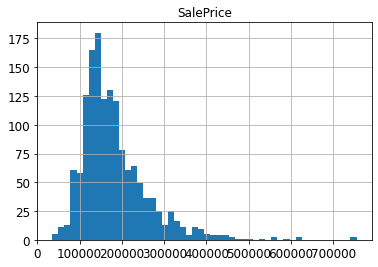

In [259]:
# hist of SalePrice
dataset.hist('SalePrice',bins=50)
plt.show()

##### from hist above, we decide to discretize the output variables into 8 categories/classes with equal-width

In [260]:
# discretize saleprice as salePriceClass from 1-8
dataset['SalePriceClass'] = pd.cut(dataset['SalePrice'],8,labels=[1,2,3,4,5,6,7,8])
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,61,0,0,0,0,2,208500,5,2
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,298,0,0,0,0,0,5,181500,31,2
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,42,0,0,0,0,9,223500,7,3
3,70,9550,7,5,1915,1970,216,540,756,961,...,0,35,272,0,0,0,2,140000,91,2
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,192,84,0,0,0,0,12,250000,8,3


In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn import metrics

In [262]:
dataset.drop('SalePrice',axis=1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,HouseAge,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,2,5,2
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,5,31,2
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,9,7,3
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,2,91,2
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,12,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,953,...,460,0,40,0,0,0,0,8,8,2
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,500,349,0,0,0,0,0,2,32,2
1457,70,9042,7,9,1941,2006,275,877,1152,1188,...,252,0,60,0,0,0,0,5,69,3
1458,20,9717,5,6,1950,1996,49,0,1078,1078,...,240,366,0,112,0,0,0,4,60,2


In [263]:
X_class = dataset.drop('SalePriceClass', 1)
y_class = dataset['SalePriceClass']
# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=60)

In [264]:
rf_class = RandomForestClassifier(n_estimators=300)
rf_class.fit(X_train, y_train)

ypred = rf_class.predict(X_test)

accuracy_score(y_test, ypred)

0.9657534246575342

In [265]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train, y_train)

ypred = dt_class.predict(X_test)

accuracy_score(y_test, ypred)

0.9931506849315068

<div>
<img src="https://miro.medium.com/max/1051/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" style="width: 400px;"/>
</div

##### We can see here the downside of the equal width binning method : since our data is mostly concentrated on a narrow span, the classes with a high sale price are almost empty and the classifier doesn't manage to predict them accurately.
##### We have therefore to keep in mind that our classifier is efficient only on samples within a certain sale price

In [266]:
confusion_matrix(y_test, ypred)

array([[ 75,   0,   0,   0,   0,   0,   0,   0],
       [  0, 149,   0,   0,   0,   0,   0,   0],
       [  0,   0,  42,   0,   0,   0,   0,   0],
       [  0,   0,   0,  19,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1]])

#### metrics matrix
##### support col: lists the number of sampels for each class

In [267]:
print(metrics.classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00       149
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1

    accuracy                           0.99       292
   macro avg       0.81      0.88      0.83       292
weighted avg       0.99      0.99      0.99       292



/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Different test size

In [268]:
X_catTrain = dataset.drop('SalePriceClass', 1)
y_catTrain = dataset['SalePriceClass']
# Creating training and testing sub datasets
X_train, X_test, y_train, y_test = train_test_split(X_catTrain, y_catTrain, test_size=0.5, random_state=60)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_catTrain, y_catTrain, test_size=0.4, random_state=60)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_catTrain, y_catTrain, test_size=0.3, random_state=60)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_catTrain, y_catTrain, test_size=0.2, random_state=60)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_catTrain, y_catTrain, test_size=0.1, random_state=60)


In [269]:
rf = RandomForestClassifier(n_estimators=300)

# test_size=0.5
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
acc_0 = accuracy_score(y_test, ypred)

# test_size=0.4
rf.fit(X_train_1, y_train_1)
ypred_1 = rf.predict(X_test_1)
acc_1 = accuracy_score(y_test_1, ypred_1)

# test_size=0.3
rf.fit(X_train_2, y_train_2)
ypred_2 = rf.predict(X_test_2)
acc_2 = accuracy_score(y_test_2, ypred_2)

# test_size=0.2
rf.fit(X_train_3, y_train_3)
ypred_3 = rf.predict(X_test_3)
acc_3 = accuracy_score(y_test_3, ypred_3)

# test_size=0.1
rf.fit(X_train_4, y_train_4)
ypred_4 = rf.predict(X_test_4)
acc_4 = accuracy_score(y_test_4, ypred_4)

In [270]:
table_diff = [['test_size', 'accuracy_score'],['0.5',acc_0],['0.4',acc_1],['0.3',acc_2],['0.2',acc_3],['0.1',acc_4]]
print(tabulate(table_diff))

---------  ------------------
test_size  accuracy_score
0.5        0.9698630136986301
0.4        0.9708904109589042
0.3        0.9634703196347032
0.2        0.9691780821917808
0.1        0.9794520547945206
---------  ------------------


### k-fold Cross Validation

<div>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="k-fold Corss Validation" style="width: 600px;"/>
</div

In [271]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn import svm

In [272]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)

cnt=1
for train_index, test_index in kf.split(X_catTrain, y_catTrain):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 1314, Test set:146
Fold:2, Train set: 1314, Test set:146
Fold:3, Train set: 1314, Test set:146
Fold:4, Train set: 1314, Test set:146
Fold:5, Train set: 1314, Test set:146
Fold:6, Train set: 1314, Test set:146
Fold:7, Train set: 1314, Test set:146
Fold:8, Train set: 1314, Test set:146
Fold:9, Train set: 1314, Test set:146
Fold:10, Train set: 1314, Test set:146


/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [273]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [274]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X_catTrain, y_catTrain, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')
# print(tabulate(table_diff))

/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Scores for each fold are: [0.97260274 0.97260274 0.96575342 0.97260274 0.96575342 0.99315068
 0.96575342 0.95890411 0.98630137 0.98630137]
Average score: 0.97


In [275]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X_catTrain, y_catTrain, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1.         1.         0.99315068 1.         1.         0.99315068
 1.         0.99315068 0.99315068 0.99315068]
Average score: 1.00


/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


### Pipeline

In [276]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.base import clone, BaseEstimator, TransformerMixin

In [277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1460 non-null   int64   
 1   LotArea         1460 non-null   int64   
 2   OverallQual     1460 non-null   int64   
 3   OverallCond     1460 non-null   int64   
 4   YearBuilt       1460 non-null   int64   
 5   YearRemodAdd    1460 non-null   int64   
 6   BsmtFinSF1      1460 non-null   int64   
 7   BsmtUnfSF       1460 non-null   int64   
 8   TotalBsmtSF     1460 non-null   int64   
 9   1stFlrSF        1460 non-null   int64   
 10  2ndFlrSF        1460 non-null   int64   
 11  GrLivArea       1460 non-null   int64   
 12  BsmtFullBath    1460 non-null   int64   
 13  FullBath        1460 non-null   int64   
 14  HalfBath        1460 non-null   int64   
 15  BedroomAbvGr    1460 non-null   int64   
 16  KitchenAbvGr    1460 non-null   int64   
 17  TotRmsAbvGrd  

In [278]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            # X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + ["OpenPorchSF"] + ["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        elif self.additional == 2:
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            # X["HouseAge"] = X["YrSold"] - X["YearBuilt"]
        else :
            X["HouseArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["WoodDeckSF"] + X["OpenPorchSF"] + X["PoolArea"]
            X["HouseAge"] = X["YrSold"] - X["YearBuilt"]

        return X

In [279]:
# PIPELINE
pipe = Pipeline([('add_feature', CombinedAttributesAdder(additional=3))])

In [280]:
full_data = pd.read_csv('House-Price-Prediction-clean.csv')

In [281]:
FullDataPipe = pipe.fit_transform(full_data.drop('Id',1))

In [282]:
FullDataPipe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseArea,TotalArea,HouseAge
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,0,0,0,2,2008,208500,2566,3175,5
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,0,0,0,0,5,2007,181500,2524,3282,31
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,0,0,0,9,2008,223500,2706,3356,7
3,70,9550,7,5,1915,1970,216,540,756,961,...,0,0,0,0,2,2006,140000,2473,3150,91
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,0,0,0,0,12,2008,250000,3343,4455,8


In [283]:
corr_matrix = FullDataPipe.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
TotalArea        0.813495
OverallQual      0.790982
HouseArea        0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePrice, dtype: float64

In [284]:
label_1 =  dataset[dataset['SalePrice']>200000]

In [285]:
label_2 = label_1[label_1['SalePrice']<300000]

In [286]:
label_2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,61,0,0,0,0,2,208500,5,2
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,42,0,0,0,0,9,223500,7,3
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,192,84,0,0,0,0,12,250000,8,3
13,20,10652,7,5,2006,2007,0,1494,1494,1494,...,160,33,0,0,0,0,8,279500,1,3
22,20,9742,8,5,2002,2002,0,1777,1777,1795,...,171,159,0,0,0,0,9,230000,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,60,10944,7,5,1994,1994,1000,223,1223,1223,...,171,132,0,0,0,0,8,271000,14,3
1447,60,10000,8,5,1995,1996,1079,141,1220,1220,...,0,65,0,0,0,0,12,240000,12,3
1451,20,9262,8,5,2008,2009,0,1573,1573,1578,...,0,36,0,0,0,0,5,287090,1,3
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,349,0,0,0,0,0,2,210000,32,2


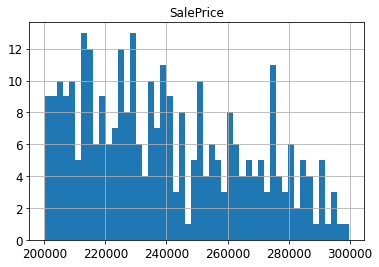

In [287]:
# hist of SalePrice
label_2.hist('SalePrice',bins=50)
plt.show()

In [288]:
# discretize saleprice as salePriceClass from 1-8
label_2['SalePriceClass'] = pd.cut(label_2['SalePrice'],10,labels=[1,2,3,4,5,6,7,8,9,10])
label_2

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_66977/966362840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_2['SalePriceClass'] = pd.cut(label_2['SalePrice'],10,labels=[1,2,3,4,5,6,7,8,9,10])


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice,HouseAge,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,0,61,0,0,0,0,2,208500,5,1
2,60,11250,7,5,2001,2002,486,434,920,920,...,0,42,0,0,0,0,9,223500,7,3
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,192,84,0,0,0,0,12,250000,8,6
13,20,10652,7,5,2006,2007,0,1494,1494,1494,...,160,33,0,0,0,0,8,279500,1,8
22,20,9742,8,5,2002,2002,0,1777,1777,1795,...,171,159,0,0,0,0,9,230000,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,60,10944,7,5,1994,1994,1000,223,1223,1223,...,171,132,0,0,0,0,8,271000,14,8
1447,60,10000,8,5,1995,1996,1079,141,1220,1220,...,0,65,0,0,0,0,12,240000,12,5
1451,20,9262,8,5,2008,2009,0,1573,1573,1578,...,0,36,0,0,0,0,5,287090,1,9
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,349,0,0,0,0,0,2,210000,32,1


In [289]:
label_2.drop('SalePrice',axis=1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,HouseAge,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,2,5,1
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,9,7,3
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,12,8,6
13,20,10652,7,5,2006,2007,0,1494,1494,1494,...,840,160,33,0,0,0,0,8,1,8
22,20,9742,8,5,2002,2002,0,1777,1777,1795,...,534,171,159,0,0,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,60,10944,7,5,1994,1994,1000,223,1223,1223,...,525,171,132,0,0,0,0,8,14,8
1447,60,10000,8,5,1995,1996,1079,141,1220,1220,...,556,0,65,0,0,0,0,12,12,5
1451,20,9262,8,5,2008,2009,0,1573,1573,1578,...,840,0,36,0,0,0,0,5,1,9
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,500,349,0,0,0,0,0,2,32,1


In [290]:
X_class = label_2.drop('SalePriceClass', 1)
y_class = label_2['SalePriceClass']
# Creating training and testing sub datasets
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X_class, y_class, test_size=0.2, random_state=60)

In [291]:
rf_class = RandomForestClassifier(n_estimators=300)
rf_class.fit(X_train_l2, y_train_l2)

ypred_l2rf = rf_class.predict(X_test_l2)

accuracy_score(y_test_l2, ypred_l2rf)

0.6984126984126984

In [292]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train_l2, y_train_l2)

ypred_l2dt = dt_class.predict(X_test_l2)

accuracy_score(y_test_l2, ypred_l2dt)

0.9841269841269841

In [293]:
confusion_matrix(y_test_l2, ypred_l2rf)

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  2]])

In [294]:
print(metrics.classification_report(y_test_l2, ypred_l2rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9
           3       0.80      1.00      0.89        12
           4       0.20      0.40      0.27         5
           5       0.50      0.12      0.20         8
           6       1.00      1.00      1.00         5
           7       0.33      0.25      0.29         4
           8       0.40      0.50      0.44         4
           9       0.50      0.67      0.57         3
          10       1.00      0.40      0.57         5

    accuracy                           0.70        63
   macro avg       0.67      0.63      0.62        63
weighted avg       0.73      0.70      0.68        63



### Week5: Bayesian Learning and Bayes Nets

In [295]:
from sklearn.naive_bayes import GaussianNB


In [296]:
gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

ypred_gnb = gnb_model.predict(X_test)

accuracy_score(y_test, ypred_gnb)

0.6835616438356165

In [300]:
# print("Number of mislabeled points out of a total %d points : %d"
#       % (X_test_l2.shape[0], (y_test_l2 != ypred_gnb).sum()))

In [ ]:
#confusion_matrix(y_test_l2, ypred_gnb)

In [301]:
#print(metrics.classification_report(y_test_l2, ypred_gnb))

##### in order to run Multinomial Naive Bayes, i need to discretize some of the features

In [299]:
FullDataPipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtUnfSF      1460 non-null   int64
 8   TotalBsmtSF    1460 non-null   int64
 9   1stFlrSF       1460 non-null   int64
 10  2ndFlrSF       1460 non-null   int64
 11  GrLivArea      1460 non-null   int64
 12  BsmtFullBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

##### add a new column to change these numerical features to categorical features, because most of them have a value of 0
##### or say Discretization

In [302]:
FullDataPipe['IsPool'] = pd.cut(FullDataPipe.PoolArea,bins=[-1,0,1000],labels=[0,1])
FullDataPipe['IsPool'] = FullDataPipe.IsPool.astype(int)
#暂时用于修改dtype，便于统一

In [303]:
# rename because 2nd give error
FullDataPipe.rename(columns={'2ndFlrSF':'SecFlrSf'}, inplace = True)

In [304]:
FullDataPipe['IsSecFlr'] = pd.cut(FullDataPipe.SecFlrSf,bins=[-1,0,3000],labels=[0,1])
FullDataPipe['IsSecFlr'] = FullDataPipe.IsSecFlr.astype(int)

In [305]:
FullDataPipe['IsWoodDeck'] = pd.cut(FullDataPipe.WoodDeckSF,bins=[-1,0,1000],labels=[0,1])
FullDataPipe['IsWoodDeck'] = FullDataPipe.IsWoodDeck.astype(int)

In [306]:
FullDataPipe['IsOpenPorch'] = pd.cut(FullDataPipe.OpenPorchSF,bins=[-1,0,1000],labels=[0,1])
FullDataPipe['IsOpenPorch'] = FullDataPipe.IsOpenPorch.astype(int)

In [307]:
FullDataPipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtUnfSF      1460 non-null   int64
 8   TotalBsmtSF    1460 non-null   int64
 9   1stFlrSF       1460 non-null   int64
 10  SecFlrSf       1460 non-null   int64
 11  GrLivArea      1460 non-null   int64
 12  BsmtFullBath   1460 non-null   int64
 13  FullBath       1460 non-null   int64
 14  HalfBath       1460 non-null   int64
 15  BedroomAbvGr   1460 non-null   int64
 16  KitchenAbvGr   1460 non-null   int64
 17  TotRmsAbvGrd   1460 non-null   int64
 18  Fireplaces     1460 non-null   int64
 19  Garage

##### corr matrix to see weather if the new col has better impact, but unfortunately it dont show up, probably need to change it from category to int64

In [308]:
corr_matrix_wk5 = FullDataPipe.corr()

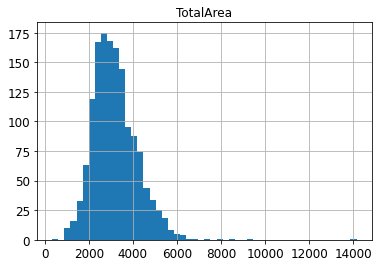

In [309]:
# hist of SalePrice
FullDataPipe.hist('TotalArea',bins=50)
plt.show()

In [310]:
corr_matrix_wk5["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
TotalArea        0.813495
OverallQual      0.790982
HouseArea        0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
IsOpenPorch      0.412959
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
SecFlrSf         0.319334
OpenPorchSF      0.315856
IsWoodDeck       0.297662
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
IsSecFlr         0.137656
ScreenPorch      0.111447
IsPool           0.093708
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
HouseAge        -0.523350
Name: SalePr

In [311]:
lbl_1 =  FullDataPipe[FullDataPipe['SalePrice']>100000]

In [312]:
lbl_2 = lbl_1[lbl_1['SalePrice']<300000]

In [313]:
lbl_2.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MoSold,YrSold,SalePrice,HouseArea,TotalArea,HouseAge,IsPool,IsSecFlr,IsWoodDeck,IsOpenPorch
0,60,8450,7,5,2003,2003,706,150,856,856,...,2,2008,208500,2566,3175,5,0,1,0,1
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,5,2007,181500,2524,3282,31,0,0,1,0
2,60,11250,7,5,2001,2002,486,434,920,920,...,9,2008,223500,2706,3356,7,0,1,0,1
3,70,9550,7,5,1915,1970,216,540,756,961,...,2,2006,140000,2473,3150,91,0,1,0,1
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,12,2008,250000,3343,4455,8,0,1,1,1


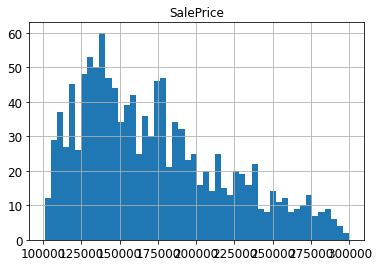

In [560]:
# hist of SalePrice
lbl_2.hist('SalePrice',bins=50)
plt.show()

In [315]:
lbl_2['SalePriceClass'] = pd.cut(lbl_2['SalePrice'],8,labels=[1,2,3,4,5,6,7,8])

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_66977/1561209007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lbl_2['SalePriceClass'] = pd.cut(lbl_2['SalePrice'],8,labels=[1,2,3,4,5,6,7,8])


In [316]:
lbl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MSSubClass      1222 non-null   int64   
 1   LotArea         1222 non-null   int64   
 2   OverallQual     1222 non-null   int64   
 3   OverallCond     1222 non-null   int64   
 4   YearBuilt       1222 non-null   int64   
 5   YearRemodAdd    1222 non-null   int64   
 6   BsmtFinSF1      1222 non-null   int64   
 7   BsmtUnfSF       1222 non-null   int64   
 8   TotalBsmtSF     1222 non-null   int64   
 9   1stFlrSF        1222 non-null   int64   
 10  SecFlrSf        1222 non-null   int64   
 11  GrLivArea       1222 non-null   int64   
 12  BsmtFullBath    1222 non-null   int64   
 13  FullBath        1222 non-null   int64   
 14  HalfBath        1222 non-null   int64   
 15  BedroomAbvGr    1222 non-null   int64   
 16  KitchenAbvGr    1222 non-null   int64   
 17  TotRmsAbvGrd  

In [317]:
lbl_2.drop('SalePrice',1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,MoSold,YrSold,HouseArea,TotalArea,HouseAge,IsPool,IsSecFlr,IsWoodDeck,IsOpenPorch,SalePriceClass
0,60,8450,7,5,2003,2003,706,150,856,856,...,2,2008,2566,3175,5,0,1,0,1,5
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,5,2007,2524,3282,31,0,0,1,0,4
2,60,11250,7,5,2001,2002,486,434,920,920,...,9,2008,2706,3356,7,0,1,0,1,5
3,70,9550,7,5,1915,1970,216,540,756,961,...,2,2006,2473,3150,91,0,1,0,1,2
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,12,2008,3343,4455,8,0,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,953,953,953,...,8,2007,2600,3100,8,0,1,0,1,3
1456,20,13175,6,6,1978,1988,790,589,1542,2073,...,2,2010,3615,4464,32,0,0,1,0,5
1457,70,9042,7,9,1941,2006,275,877,1152,1188,...,5,2010,3492,3804,69,0,1,0,1,7
1458,20,9717,5,6,1950,1996,49,0,1078,1078,...,4,2010,2156,2762,60,0,0,1,0,2


In [318]:
X_wk5 = lbl_2.drop('SalePriceClass', 1)
y_wk5 = lbl_2['SalePriceClass']
# Creating training and testing sub datasets
X_train_w5, X_test_w5, y_train_w5, y_test_w5 = train_test_split(X_wk5, y_wk5, test_size=0.2)

In [319]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB

In [320]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_w5, y_train_w5)
ypred_gnb = gnb_model.predict(X_test_w5)
gnb_score = accuracy_score(y_test_w5, ypred_gnb)
print(gnb_score)

0.7346938775510204


In [321]:
confusion_matrix(y_test_w5, ypred_gnb)

array([[37,  2,  0,  0,  0,  0,  0,  0],
       [ 7, 59,  2,  1,  0,  0,  0,  0],
       [ 0, 11, 17,  7,  0,  0,  0,  0],
       [ 0,  0,  2, 27,  8,  1,  0,  0],
       [ 0,  0,  0,  0, 24,  2,  0,  0],
       [ 0,  0,  0,  0, 10,  3,  3,  0],
       [ 0,  0,  0,  0,  0,  2,  6,  0],
       [ 0,  0,  0,  0,  0,  1,  6,  7]])

In [322]:
print(metrics.classification_report(y_test_w5, ypred_gnb))

              precision    recall  f1-score   support

           1       0.84      0.95      0.89        39
           2       0.82      0.86      0.84        69
           3       0.81      0.49      0.61        35
           4       0.77      0.71      0.74        38
           5       0.57      0.92      0.71        26
           6       0.33      0.19      0.24        16
           7       0.40      0.75      0.52         8
           8       1.00      0.50      0.67        14

    accuracy                           0.73       245
   macro avg       0.69      0.67      0.65       245
weighted avg       0.75      0.73      0.72       245



In [323]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_w5, y_train_w5)
ypred_mnb = mnb_model.predict(X_test_w5)
mnb_score = accuracy_score(y_test_w5, ypred_mnb)
print(mnb_score)

0.37551020408163266


In [324]:
print(metrics.classification_report(y_test_w5, ypred_mnb))

              precision    recall  f1-score   support

           1       0.56      0.62      0.59        39
           2       0.54      0.49      0.52        69
           3       0.43      0.17      0.24        35
           4       0.32      0.18      0.23        38
           5       0.23      0.58      0.33        26
           6       0.12      0.06      0.08        16
           7       0.26      0.62      0.37         8
           8       0.00      0.00      0.00        14

    accuracy                           0.38       245
   macro avg       0.31      0.34      0.29       245
weighted avg       0.39      0.38      0.36       245



In [325]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train_w5, y_train_w5)
ypred_bnb = bnb_model.predict(X_test_w5)
bnb_score = accuracy_score(y_test_w5, ypred_bnb)
print(bnb_score)

0.3020408163265306


In [326]:
print(metrics.classification_report(y_test_w5, ypred_bnb))

              precision    recall  f1-score   support

           1       0.39      0.28      0.33        39
           2       0.45      0.45      0.45        69
           3       0.21      0.26      0.23        35
           4       0.25      0.50      0.33        38
           5       0.30      0.12      0.17        26
           6       0.00      0.00      0.00        16
           7       0.06      0.12      0.08         8
           8       0.00      0.00      0.00        14

    accuracy                           0.30       245
   macro avg       0.21      0.22      0.20       245
weighted avg       0.29      0.30      0.28       245



/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [327]:
cmpnb_model = ComplementNB()
cmpnb_model.fit(X_train_w5, y_train_w5)
ypred_cmpnb = cmpnb_model.predict(X_test_w5)
cmpnb_score = accuracy_score(y_test_w5, ypred_cmpnb)
print(cmpnb_score)

0.3142857142857143


In [328]:
print(metrics.classification_report(y_test_w5, ypred_cmpnb))

              precision    recall  f1-score   support

           1       0.26      0.28      0.27        39
           2       0.42      0.55      0.48        69
           3       0.57      0.11      0.19        35
           4       0.45      0.13      0.20        38
           5       0.19      0.54      0.29        26
           6       0.33      0.25      0.29        16
           7       0.09      0.12      0.11         8
           8       0.00      0.00      0.00        14

    accuracy                           0.31       245
   macro avg       0.29      0.25      0.23       245
weighted avg       0.36      0.31      0.29       245



/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liujinglei/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
table = [['algorithmName','accuracyScore' ], ['GaussianNB', gnb_score], ['MultinomialNB', mnb_score], ['BernoulliNB', bnb_score], 
         ['ComplementNB',cmpnb_score]]
         
print(tabulate(table))
# CategoricalNB

-------------  -------------------
algorithmName  accuracyScore
GaussianNB     0.7346938775510204
MultinomialNB  0.37551020408163266
BernoulliNB    0.3020408163265306
ComplementNB   0.3142857142857143
-------------  -------------------


##### Bayesian networks

In [330]:
import bnlearn as bn

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


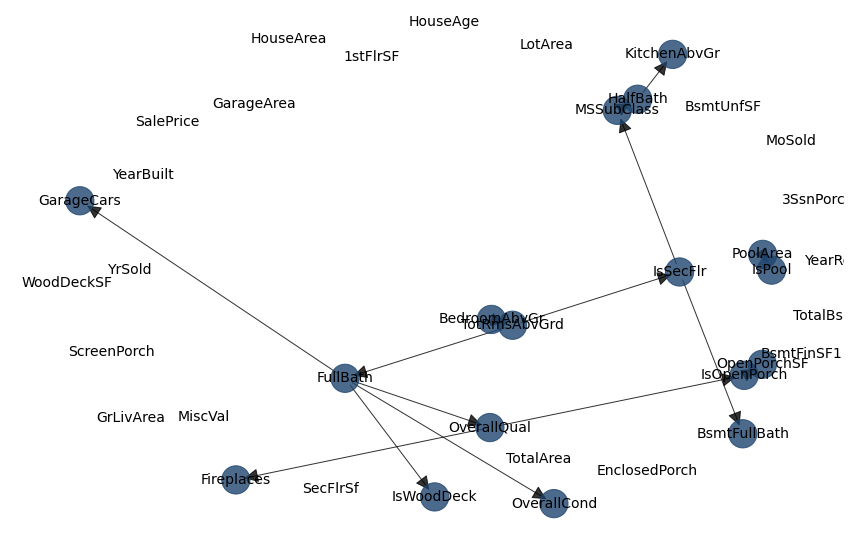

In [331]:
bn_model = bn.structure_learning.fit(X_train_w5)
G = bn.plot(bn_model)


In [332]:
%store bn_model

Stored 'bn_model' (dict)


### Week7 Clustering

In [333]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#### K-means

In [564]:
pd.set_option('display.max_columns', None)
FullDataPipe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,SecFlrSf,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseArea,TotalArea,HouseAge,IsPool,IsSecFlr,IsWoodDeck,IsOpenPorch
0,60,8450,7,5,2003,2003,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,2566,3175,5,0,1,0,1
1,20,9600,6,8,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,2524,3282,31,0,0,1,0
2,60,11250,7,5,2001,2002,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,2706,3356,7,0,1,0,1
3,70,9550,7,5,1915,1970,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,2473,3150,91,0,1,0,1
4,60,14260,8,5,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3343,4455,8,0,1,1,1


In [613]:
corr_matrix = lbl_2.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.728362
TotalArea        0.706573
HouseArea        0.653460
GrLivArea        0.590764
GarageCars       0.563786
FullBath         0.557142
GarageArea       0.527149
YearBuilt        0.523159
YearRemodAdd     0.485771
TotalBsmtSF      0.447287
1stFlrSF         0.437859
IsOpenPorch      0.435484
TotRmsAbvGrd     0.392746
Fireplaces       0.385355
OpenPorchSF      0.305112
SecFlrSf         0.282493
HalfBath         0.250816
IsWoodDeck       0.245165
BsmtUnfSF        0.227658
LotArea          0.225552
WoodDeckSF       0.224462
BsmtFinSF1       0.172794
IsSecFlr         0.142973
BedroomAbvGr     0.119226
BsmtFullBath     0.114626
ScreenPorch      0.102397
MoSold           0.065502
PoolArea         0.062152
IsPool           0.058892
3SsnPorch        0.038898
MiscVal          0.001557
YrSold          -0.014649
MSSubClass      -0.032074
EnclosedPorch   -0.115084
KitchenAbvGr    -0.148180
OverallCond     -0.161308
HouseAge        -0.523187
Name: SalePr

In [614]:
X = lbl_2[["SalePrice","TotalArea"]]
y = lbl_2['SalePrice']

In [615]:
from sklearn.cluster import KMeans

In [637]:
k = 5
km = KMeans(n_clusters=k, random_state=42)
y_pred_wk7 = km.fit_predict(X)

In [638]:
y_pred_wk7

array([1, 3, 1, ..., 4, 0, 0], dtype=int32)

In [639]:
km.labels_

array([1, 3, 1, ..., 4, 0, 0], dtype=int32)

In [640]:
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [641]:
km.cluster_centers_

array([[148372.75942029,   2883.79130435],
       [223980.61666667,   3774.77222222],
       [120008.87586207,   2424.9       ],
       [183060.4604811 ,   3312.25773196],
       [268810.23275862,   4276.04310345]])

##### Voronoi diagram:

In [642]:
def plot_data(X):
    plt.plot(X["SalePrice"],X["TotalArea"], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    print(mins)
    print(maxs)
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


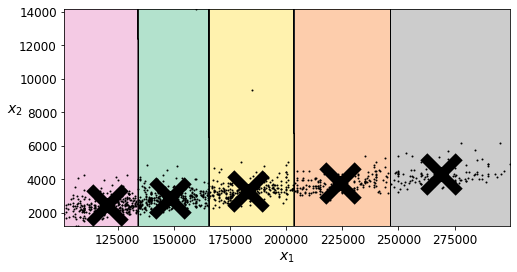

In [643]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km, X)
plt.show()

In [644]:
k = 6
km = KMeans(n_clusters=k, random_state=42)
y_pred_wk7 = km.fit_predict(X)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


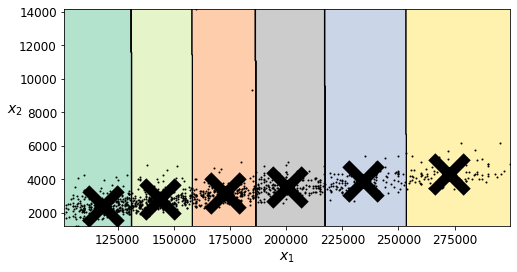

In [645]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km, X)
plt.show()

In [646]:
k = 10
km = KMeans(n_clusters=k, random_state=42)
y_pred_wk7 = km.fit_predict(X)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


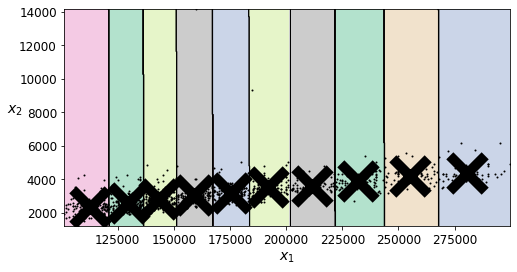

In [647]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(km, X)
plt.show()

### Soft clustering: 
km.transform(X) transforms X to a cluster-distance space

In [648]:
km.transform(X)

array([[ 78856.12071025,  23585.41318292,  33042.9883733 , ...,
         46851.70758135,  49372.7668947 ,   2996.35129117],
       [ 51858.62378317,  50578.47901479,   6044.56088932, ...,
         73846.61273652,  22373.76588835,  29967.79793459],
       [ 93857.08346532,   8590.75002473,  48043.44340585, ...,
         31851.48238809,  64373.32281376,  12036.35033623],
       ...,
       [136859.34856692,  34425.08633934,  91045.36939818, ...,
         11164.08941254, 107375.22944639,  55034.26464321],
       [ 12480.19863226,  89956.88896939,  33334.20950932, ...,
        113225.02190891,  17004.91637215,  69346.17358861],
       [ 17882.50327271,  84575.46654675,  27960.6243888 , ...,
        107842.91848244,  11639.7302199 ,  63966.11539374]])

In [649]:
np.linalg.norm(np.tile(X, (1, k)).reshape(-1, k, 2) - km.cluster_centers_, axis=2)

array([[ 78856.12071025,  23585.41318292,  33042.9883733 , ...,
         46851.70758135,  49372.7668947 ,   2996.35129117],
       [ 51858.62378317,  50578.47901479,   6044.56088932, ...,
         73846.61273652,  22373.76588835,  29967.79793459],
       [ 93857.08346532,   8590.75002473,  48043.44340585, ...,
         31851.48238809,  64373.32281376,  12036.35033623],
       ...,
       [136859.34856692,  34425.08633934,  91045.36939818, ...,
         11164.08941254, 107375.22944639,  55034.26464321],
       [ 12480.19863226,  89956.88896939,  33334.20950932, ...,
        113225.02190891,  17004.91637215,  69346.17358861],
       [ 17882.50327271,  84575.46654675,  27960.6243888 , ...,
        107842.91848244,  11639.7302199 ,  63966.11539374]])

### K-Means Algorithm
* Initialize k centorids randomly, and randmoly choose k instances and centroids will place at their places.
* Repeat until centroids stop moving, all the instances are assign to its closest centroid.
* Centroids are updated to be the mean of its instances.

In [650]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


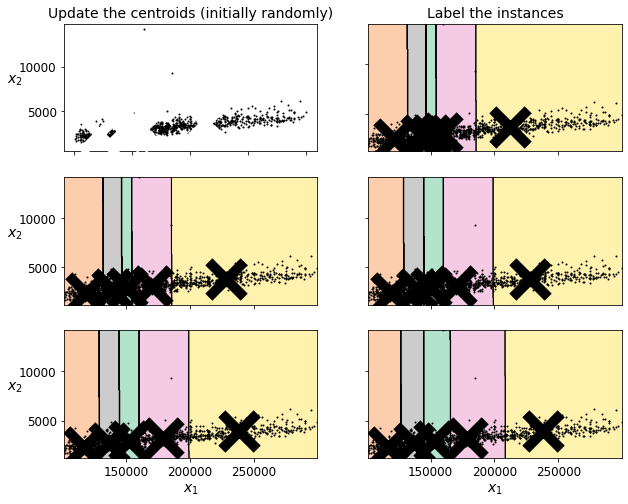

In [651]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### K-Means Variability

In [652]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


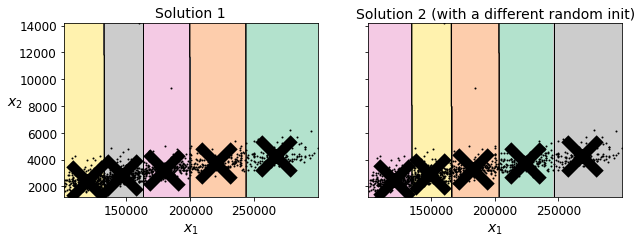

In [653]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

### Inertia
* reflects the distance between each instances and centroid

In [676]:
km.inertia_ / 100000000

328.2190616350773

In [655]:
X_dist = km.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), km.labels_]**2)
#sum of the squared distances between each training instance and its closest centroid

32821906163.506775

In [656]:
km.score(X)
#negative value is for "great is better"

-32821906163.507736

In [657]:
kmeans_rnd_init1.inertia_

132248749469.9652

In [658]:
kmeans_rnd_init2.inertia_

130993858039.72966

In [659]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


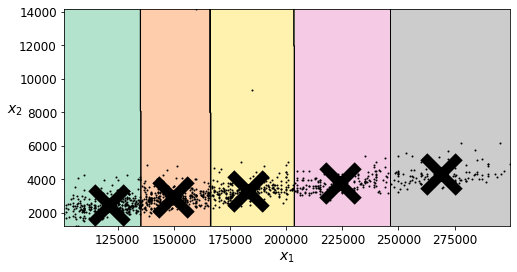

In [660]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64
SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


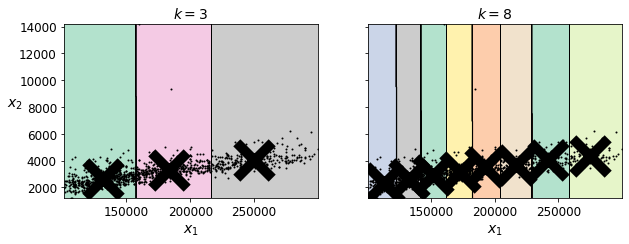

In [661]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [674]:
kmeans_k3.inertia_ / 100000000

3450.394509542524

In [675]:
kmeans_k8.inertia_ / 100000000

531.1839134926597

In [664]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

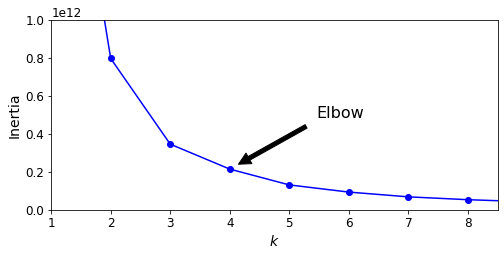

In [682]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1000000000000])
plt.show()

SalePrice    100999.9
TotalArea      1175.9
dtype: float64
SalePrice    299800.1
TotalArea     14156.1
dtype: float64


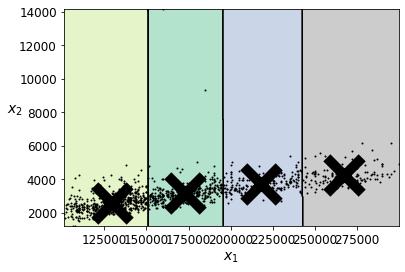

In [683]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()